<a href="https://colab.research.google.com/github/Zakaal/machine-learning_24-25/blob/main/week4/praktikum_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

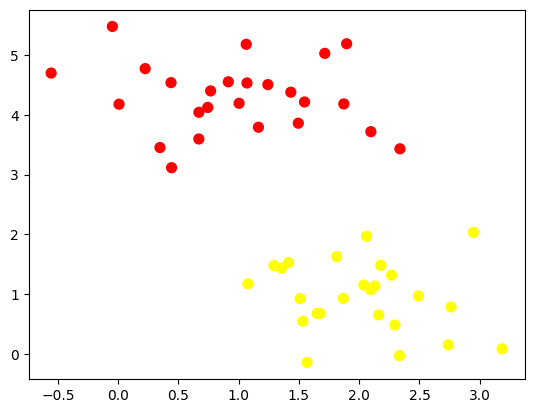

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

array([-1.        , -0.90816327, -0.81632653, -0.7244898 , -0.63265306,
       -0.54081633, -0.44897959, -0.35714286, -0.26530612, -0.17346939,
       -0.08163265,  0.01020408,  0.10204082,  0.19387755,  0.28571429,
        0.37755102,  0.46938776,  0.56122449,  0.65306122,  0.74489796,
        0.83673469,  0.92857143,  1.02040816,  1.1122449 ,  1.20408163,
        1.29591837,  1.3877551 ,  1.47959184,  1.57142857,  1.66326531,
        1.75510204,  1.84693878,  1.93877551,  2.03061224,  2.12244898,
        2.21428571,  2.30612245,  2.39795918,  2.48979592,  2.58163265,
        2.67346939,  2.76530612,  2.85714286,  2.94897959,  3.04081633,
        3.13265306,  3.2244898 ,  3.31632653,  3.40816327,  3.5       ])

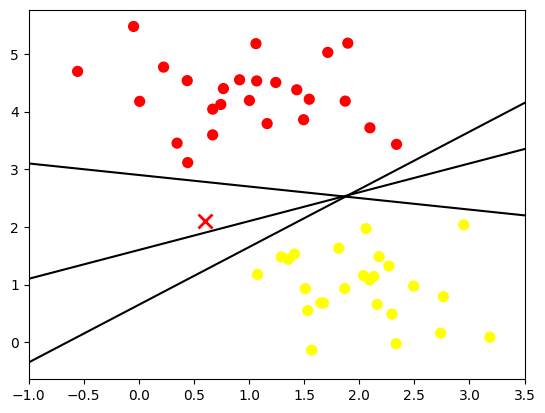

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
xfit

(-1.0, 3.5)

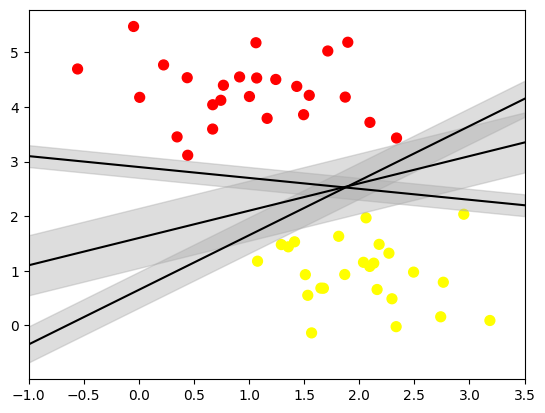

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

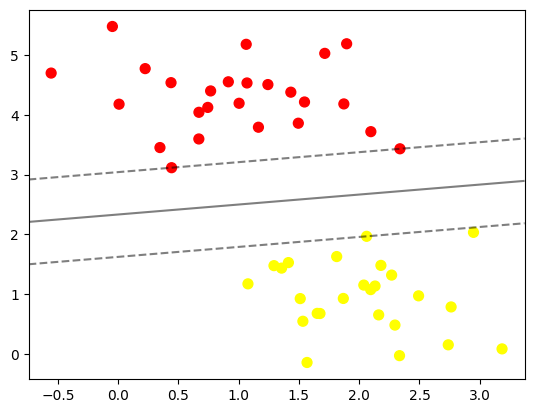

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

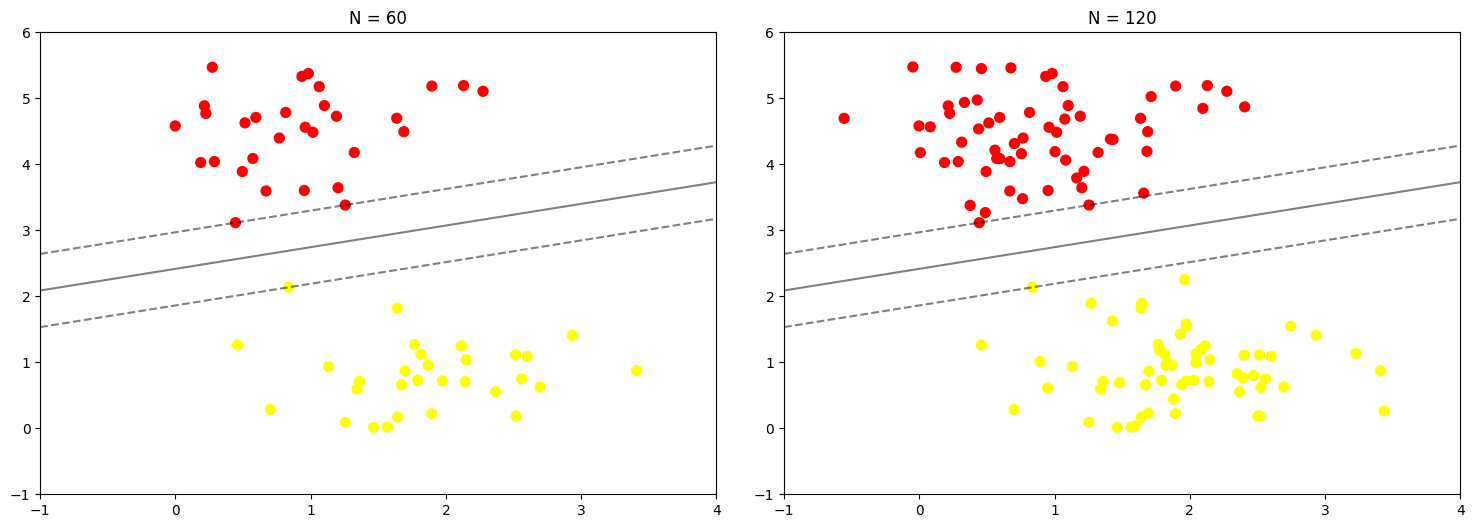

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

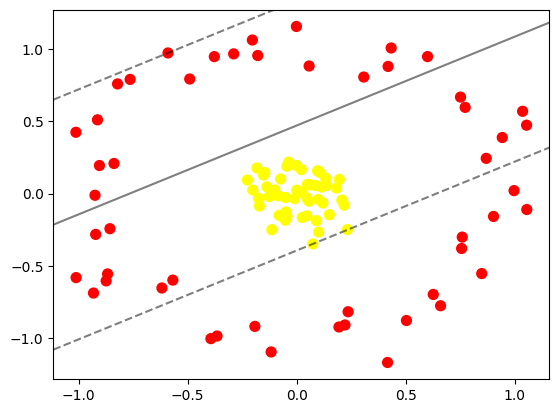

In [10]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)
r = np.exp(-(X ** 2).sum(1))
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [11]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.91860368e-01, -9.16581090e-01],
       [ 1.93764110e-01, -9.20773832e-01],
       [ 9.02692851e-01, -1.57350052e-01],
       [ 2.21380398e-01, -9.06949152e-01],
       [ 1.05389220e-01,  1.46678843e-01],
       [ 1.03597253e+00,  5.68729348e-01],
       [-3.65418445e-01, -9.83164628e-01],
       [-5.16486166e-02, -2.65473376e-02],
       [-8.37996766e-01,  2.08312651e-01],
       [ 1.05523485e+00, -1.09753651e-01],
       [ 1.19859068e-01, -6.42569418e-02],
       [-8.02656807e-02, -1.49990898e-01],
       [-1.00330507e-01,  2.58387828e-02],
       [-5.68022873e-01, -5.97136871e-01],
       [-1.01271768e+00,  4.23922332e-01],
       [ 5.69688849e-02,  8.81502197e-01],
       [-1.78647092e-01,  9.53866553e-01],
       [ 9.85298658e-02, -3.99286756e-02],
       [-8.37946031e-02, -1.57208552e-02],
       [-8.67299225e-01, -5.54557698e-01],
       [-1.16990443e-01, -1.19571917e-02],
       [-2.89096001e-01,  9.65231697e-01],
       [-1.82523492e-01,  1.77240628e-01],
       [ 1.05421298e+00,  4.72796539e-01],
       [-1.36524473e-01,  4.69274001e-02],
       [ 2.11123383e-02,  1.65910892e-01],
       [ 1.60491534e-04,  2.41760853e-02],
       [-4.47979755e-02, -1.53669097e-01],
       [ 8.57376646e-02,  5.54796064e-02],
       [ 2.17472715e-01, -7.95210928e-02],
       [ 4.16694759e-01, -1.16596072e+00],
       [ 1.95312236e-01,  9.85071935e-02],
       [-1.03702820e-02, -3.45507459e-02],
       [ 6.17706417e-02,  6.10837056e-02],
       [ 7.38782277e-02, -3.47261700e-01],
       [ 2.07194798e-01, -4.40004367e-02],
       [ 4.33155002e-01,  1.00601627e+00],
       [ 9.96738174e-01,  2.10130057e-02],
       [-1.71142144e-01, -8.55809886e-02],
       [-1.01172229e+00, -5.79789108e-01],
       [-1.17292977e-01, -1.09319413e+00],
       [-8.56561196e-01, -2.41927580e-01],
       [ 1.32572949e-01,  1.07188856e-01],
       [-2.03400519e-01,  1.06094033e+00],
       [-3.75052192e-02,  2.17246825e-01],
       [-1.79550219e-03,  1.94756639e-01],
       [ 2.32835687e-01, -2.47864767e-01],
       [ 7.72504806e-01,  5.95976451e-01],
       [ 3.07546906e-01,  8.05265801e-01],
       [-8.73883709e-01, -6.02389210e-01],
       [-1.74861382e-01, -3.22463668e-02],
       [ 1.00217858e-01,  1.55907520e-01],
       [-1.14095804e-01, -2.48768639e-01],
       [ 4.19049428e-01,  8.78593187e-01],
       [ 6.26202244e-01, -6.96073557e-01],
       [-4.46803890e-02,  1.89452300e-01],
       [ 5.03269859e-01, -8.76173761e-01],
       [ 1.37028195e-01,  5.61161948e-02],
       [-2.01414369e-01,  2.47071603e-02],
       [-2.26298530e-01,  9.41584449e-02],
       [ 2.53573982e-02, -1.64940193e-01],
       [ 9.42746858e-01,  3.87661814e-01],
       [-3.93680876e-01, -1.00128934e+00],
       [ 4.54984461e-02, -2.90770552e-02],
       [ 8.48538549e-01, -5.51931285e-01],
       [-1.42478272e-03,  1.15448978e+00],
       [-1.27181365e-01, -2.04630460e-02],
       [ 6.59673601e-01, -7.74233329e-01],
       [-9.32009771e-01, -6.86476041e-01],
       [ 2.35736719e-01, -8.15586420e-01],
       [-7.64045847e-01,  7.89042196e-01],
       [-4.93111380e-02, -1.26543986e-01],
       [-9.25138417e-01, -1.11367217e-02],
       [ 6.00032104e-01,  9.46489205e-01],
       [-3.77858735e-01,  9.46226276e-01],
       [ 1.82674381e-01,  3.81453858e-02],
       [ 4.68894379e-02, -1.53617831e-01],
       [-5.90200432e-01,  9.71618557e-01],
       [-4.90560607e-01,  7.91741358e-01],
       [ 4.83495239e-02,  6.32253249e-02],
       [-6.18110883e-01, -6.51414641e-01],
       [-9.21964619e-01, -2.81358003e-01],
       [ 9.57783496e-02,  1.57090537e-01],
       [ 8.69176973e-01,  2.43725979e-01],
       [-9.04761494e-01,  1.94228319e-01],
       [ 7.51274483e-01,  6.66876086e-01],
       [ 1.00842882e-01, -2.65234136e-01],
       [ 1.49640259e-01, -1.45685866e-01],
       [ 2.34479567e-02,  8.00392739e-03],
       [-1.52193872e-01,  1.28383790e-01],
       [-1.46355392e-01,  1.44860832e-01],
       [ 9.04552401e-02, -1.86403744e-01

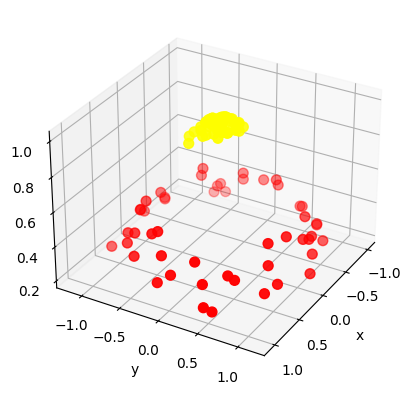

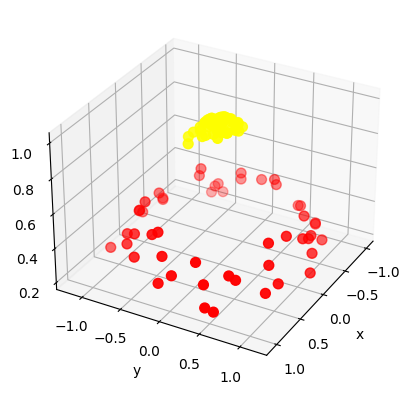

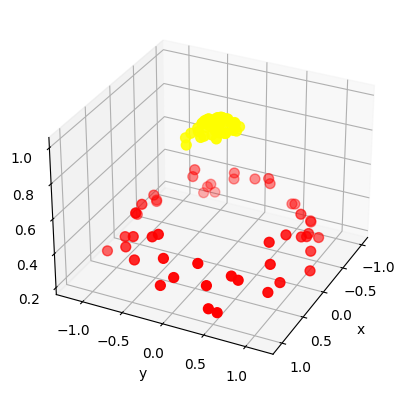

In [12]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y))

In [13]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

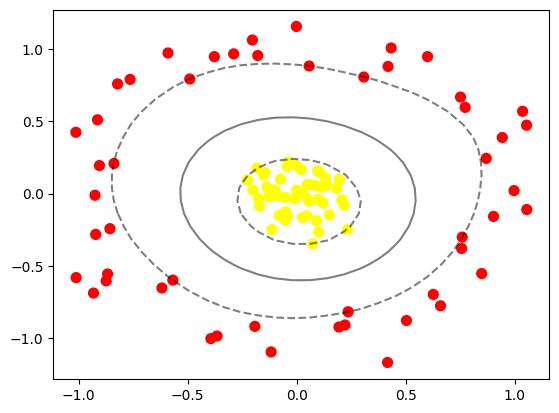

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

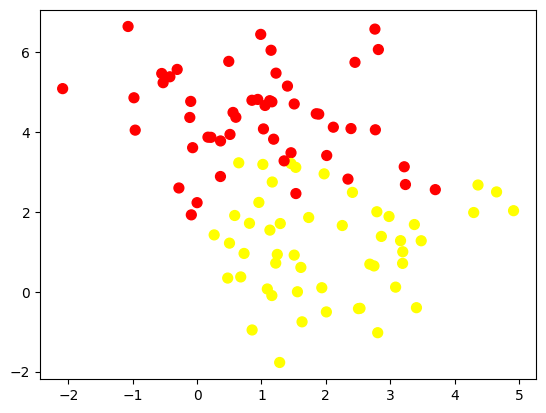

In [15]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

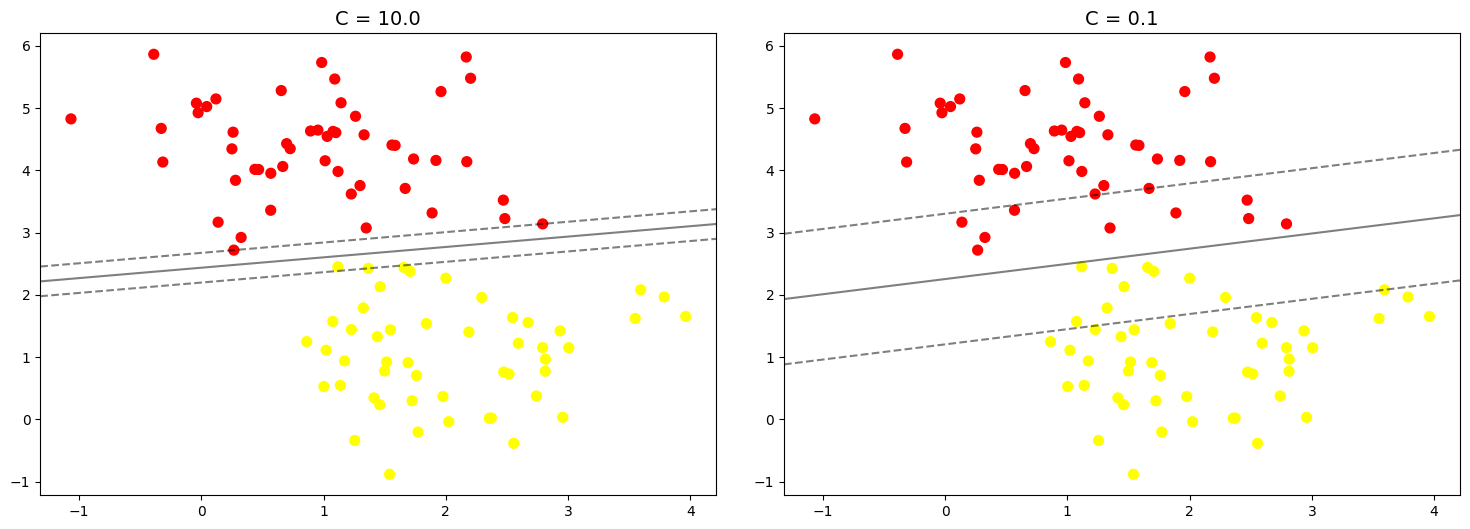

In [16]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)